In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Columns found: ['Temperature', 'Revenue']

θ0 (intercept) = 5.6806
θ1 (slope)     = 22.9735
Final cost J   = 397.2306
Equation: Revenue = 5.6806 + 22.9735 * Temperature


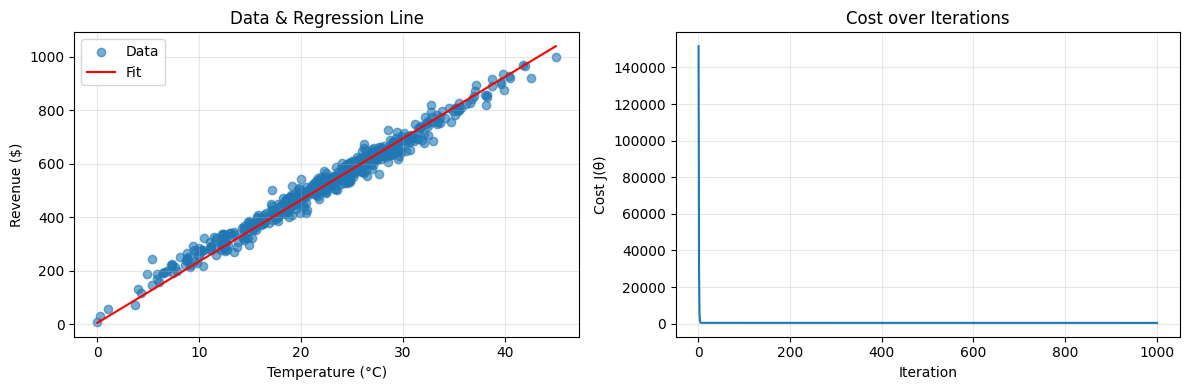

Temp 15°C -> Pred Revenue $350.28
Temp 25°C -> Pred Revenue $580.02
Temp 35°C -> Pred Revenue $809.75


In [10]:
# Simple Univariate Linear Regression (Kaggle-friendly, minimal)
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- find CSV in /kaggle/input (Kaggle will place attached datasets here) ---
candidates = glob.glob('/kaggle/input/**/*.csv', recursive=True)
if not candidates:
    raise FileNotFoundError("No CSV found in /kaggle/input. Use 'Add data' to attach the dataset.")
csv_path = candidates[0]   # pick first CSV (keep it simple)

# --- load data (assumes two numeric columns: Temperature, Revenue) ---
df = pd.read_csv(csv_path)
print("Columns found:", df.columns.tolist())

# choose columns (adjust names if your CSV uses different headers)
# If CSV has named columns "Temperature" and "Revenue", use them; otherwise use first two numeric columns:
if 'Temperature' in df.columns and 'Revenue' in df.columns:
    X = df['Temperature'].values.astype(float)
    y = df['Revenue'].values.astype(float)
else:
    nums = df.select_dtypes(include=[np.number]).columns
    X = df[nums[0]].values.astype(float)
    y = df[nums[1]].values.astype(float)

m = len(y)  # number of examples

# --- prepare data ---
X_b = np.column_stack((np.ones(m), X))   # add bias column
theta = np.zeros(2)                      # initialize parameters [theta0, theta1]

# --- hyperparameters (simple to tweak) ---
alpha = 0.001       # learning rate
iters = 1000       # iterations

# --- gradient descent (vectorized, but simple) ---
J_history = []
for _ in range(iters):
    preds = X_b.dot(theta)                # hypothesis
    error = preds - y
    J = (1/(2*m)) * np.sum(error**2)
    J_history.append(J)
    grad = (1/m) * X_b.T.dot(error)      # gradient (2,)
    theta = theta - alpha * grad

# --- results ---
print(f"\nθ0 (intercept) = {theta[0]:.4f}")
print(f"θ1 (slope)     = {theta[1]:.4f}")
print(f"Final cost J   = {J_history[-1]:.4f}")
print(f"Equation: Revenue = {theta[0]:.4f} + {theta[1]:.4f} * Temperature")

# --- plots ---
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.scatter(X, y, label='Data', alpha=0.6)
# plot regression line:
xs = np.linspace(X.min(), X.max(), 100)
ys = theta[0] + theta[1] * xs
plt.plot(xs, ys, color='red', label='Fit')
plt.xlabel('Temperature (°C)')
plt.ylabel('Revenue ($)')
plt.title('Data & Regression Line')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1,2,2)
plt.plot(range(1, iters+1), J_history)
plt.xlabel('Iteration')
plt.ylabel('Cost J(θ)')
plt.title('Cost over Iterations')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# --- quick sample predictions ---
for t in [15, 25, 35]:
    print(f"Temp {t}°C -> Pred Revenue ${theta[0] + theta[1]*t:.2f}")
